# Classification: Hotels
---
Libraries:

In [1]:
import pandas as pd
import numpy as np
import spacy

from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

import joblib
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

Functions:

In [2]:
# Function For Text Normalization
def clean_text(data):
    urls = r'http\S+'
    non_unicode_char = r'\W'
    numbers = r'[0-9_]'
    fix_whitespace = r'\s+'
    single_whitespace = ' '
    
    data = (data.replace([urls], single_whitespace, regex=True)
                    .replace([non_unicode_char, numbers], single_whitespace, regex=True)
                    .replace(fix_whitespace, single_whitespace, regex=True))
    data = data.apply(lambda s: s.lower() if type(s) == str else s)
    return data

# NLP Functions
nlp_el = spacy.load('el_core_news_md')
nlp_en = spacy.load('en_core_web_sm')
STOPWORDS = set(list(spacy.lang.en.STOP_WORDS) + list(spacy.lang.el.STOP_WORDS))

def remove_stopwords(row):
    row = [str(token) for token in nlp_el(row)]
    return [w for w in row if w not in STOPWORDS]

def tokenize_lemmatize(row):
    return [str(token.lemma_) for token in nlp_el(row)]

def tokenize_lemmatize_en(row):
    return [str(token.lemma_) for token in nlp_en(row)]

Load Dataset:

In [3]:
validation_set = pd.read_csv('../../../datasets/Hotels/classification/hotels-validation-set-enhanced.csv')
validation_set = validation_set.replace(np.nan, '')
validation_set.head()

,screen_name,name,description,statuses_count,friends_count,followers_count,recent_100_statuses,hotel,friends_hotel_count_1000,followers_hotel_count_1000,mention_hotel_count
0,SophiaSuites,Sophia Collection Santorini,"Luxury Suites, hotels and villas Santorini com...",513,41,127,"""The tans will fade but the memories will las...",1,4,15,0
1,AnthiMariaApart,AnthiMariaApartments,Anthi Maria Beach Apartments is a self-caterin...,102,25,110,Our fantastic New and Improved abc online web...,1,5,12,0
2,wEndowproject,wEndow project,WEndow Escape Resort & Villas | Tailor-made Ad...,350,344,103,https://t.co/DHuXrG8G6o For those who still d...,1,33,14,0
3,paphotels,paphotels,"The best of Greek hospitality! Follow us, visi...",975,1182,475,@AlbertBourla 💯💯💯💯💯 Happy Easter !!!🐣 @paphot...,1,67,58,0
4,medpalace,Mediterranean Palace,A cozy 5 star hotel in the city center with an...,269,543,381,https://t.co/WPCR6KSnw2 New era!\nNew Brand! ...,1,49,23,1


In [4]:
# Variable to Hold predicted labels 
predictions = pd.DataFrame()
predictions['screen_name'] = validation_set['screen_name']
predictions['true_label'] = validation_set['hotel']

# Case 1: Name and Description of a Node
---

              precision    recall  f1-score   support

   Not-Hotel       0.86      1.00      0.93        25
       Hotel       1.00      0.84      0.91        25

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.92        50
weighted avg       0.93      0.92      0.92        50



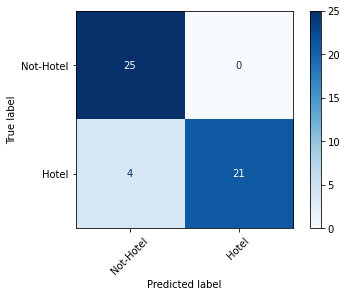

In [5]:
def get_text_data_hotel_nd(df):
    df['textdata'] = clean_text(df['name'] + ' ' + df['description'])
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize_en(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: remove_stopwords(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    
    return df.textdata

# Load the model
model_nd = joblib.load('classifiers/classifier_hotel_nd.sav')

target_names = ['Not-Hotel', 'Hotel']
predicted_labels = model_nd.predict(validation_set)
print(classification_report(y_true = validation_set.hotel, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(model_nd, validation_set, validation_set.hotel, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)

In [6]:
predictions['nd'] = predicted_labels

# Case 2: Recent 100 Tweets of a Node
---

## Only Tweets

              precision    recall  f1-score   support

   Not-Hotel       0.96      0.96      0.96        25
       Hotel       0.96      0.96      0.96        25

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



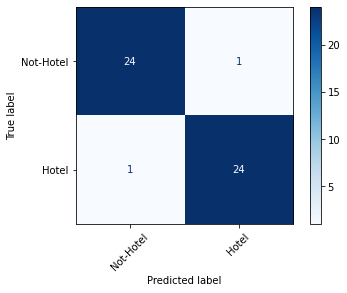

In [8]:
def get_text_data_hotel_t(df):
    df['textdata'] = clean_text(df['recent_100_statuses'])
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize_en(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: remove_stopwords(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    
    return df.textdata


# Load the model
model_t = joblib.load('classifiers/classifier_hotel_t.sav')

target_names = ['Not-Hotel', 'Hotel']
predicted_labels = model_t.predict(validation_set)
print(classification_report(y_true = validation_set.hotel, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(model_t, validation_set, validation_set.hotel, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)

predictions['t'] = predicted_labels

## Name, Description and Tweets

              precision    recall  f1-score   support

   Not-Hotel       0.96      0.96      0.96        25
       Hotel       0.96      0.96      0.96        25

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



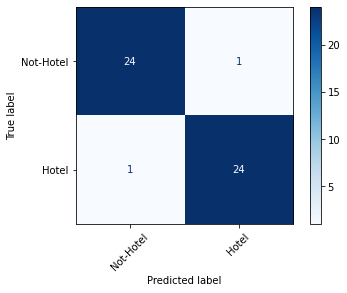

In [6]:
def get_text_data_hotel_ndt(df):
    df['textdata'] = clean_text(df['name'] + ' ' + df['description'] + ' ' + df['recent_100_statuses'])
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: remove_stopwords(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    return df.textdata

# Load the model
model_ndt = joblib.load('classifiers/classifier_hotel_ndt.sav')

target_names = ['Not-Hotel', 'Hotel']
predicted_labels = model_ndt.predict(validation_set)
print(classification_report(y_true = validation_set.hotel, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(model_ndt, validation_set, validation_set.hotel, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)

predictions['ndt'] = predicted_labels

# Case 3: Parliament Member Friends Count

## Only Counts

              precision    recall  f1-score   support

   Not-Hotel       0.57      0.68      0.62        25
       Hotel       0.60      0.48      0.53        25

    accuracy                           0.58        50
   macro avg       0.58      0.58      0.58        50
weighted avg       0.58      0.58      0.58        50



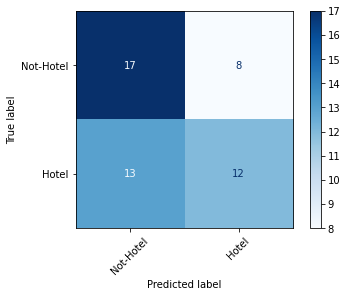

In [9]:
# Function to select the data
def get_data_hotel_fr(df):
    data = df['friends_hotel_count_1000'].to_numpy()
    return data.reshape(-1,1)

# Load the model
model_fr = joblib.load('classifiers/classifier_hotel_fr.sav')

target_names = ['Not-Hotel', 'Hotel']
predicted_labels = model_fr.predict(validation_set)
print(classification_report(y_true = validation_set.hotel, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(model_fr, validation_set, validation_set.hotel, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)

predictions['fr'] = predicted_labels

## Name Description Tweets Counts

              precision    recall  f1-score   support

   Not-Hotel       0.86      0.96      0.91        25
       Hotel       0.95      0.84      0.89        25

    accuracy                           0.90        50
   macro avg       0.91      0.90      0.90        50
weighted avg       0.91      0.90      0.90        50



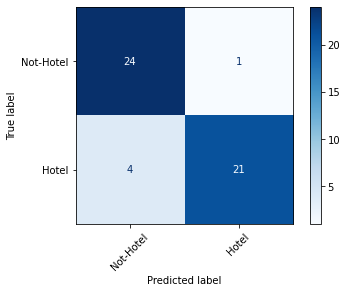

In [11]:
def get_hotel_text_data_(df):
    df = df.copy()
    df['textdata'] = clean_text(df['name']+ ' ' + df['description'] + ' ' + df['recent_100_statuses'])
    df['textdata'] = df['textdata'].apply(lambda row: remove_stopwords(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    return df.textdata


def get_hotel_numeric_data_(df):
    data = df['friends_hotel_count_1000'].to_numpy()
    return data.reshape(-1,1)


# Load the model
model_ndtfr = joblib.load('classifiers/classifier_hotel_ndtfr.sav')

target_names = ['Not-Hotel', 'Hotel']
predicted_labels = model_ndtfr.predict(validation_set)
print(classification_report(y_true = validation_set.hotel, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(model_ndtfr, validation_set, validation_set.hotel, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)

predictions['ndtfr'] = predicted_labels

# Case 4: Parliament Member Followers Count

## Only Counts

              precision    recall  f1-score   support

   Not-Hotel       0.55      0.84      0.67        25
       Hotel       0.67      0.32      0.43        25

    accuracy                           0.58        50
   macro avg       0.61      0.58      0.55        50
weighted avg       0.61      0.58      0.55        50



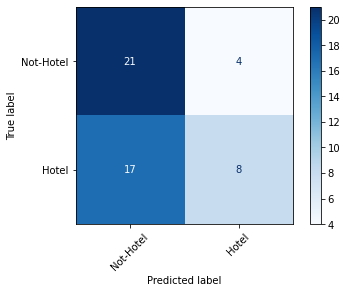

In [12]:
# Function to select the data
def get_data_hotel_fo(df):
    data = df['followers_hotel_count_1000'].to_numpy()
    return data.reshape(-1,1)

# Load the model
model_fo = joblib.load('classifiers/classifier_hotel_fo.sav')

target_names = ['Not-Hotel', 'Hotel']
predicted_labels = model_fo.predict(validation_set)
print(classification_report(y_true = validation_set.hotel, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(model_fo, validation_set, validation_set.hotel, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)

predictions['fo'] = predicted_labels

## Friends and Followers Parliament member Counts

              precision    recall  f1-score   support

   Not-Hotel       0.58      0.72      0.64        25
       Hotel       0.63      0.48      0.55        25

    accuracy                           0.60        50
   macro avg       0.61      0.60      0.59        50
weighted avg       0.61      0.60      0.59        50



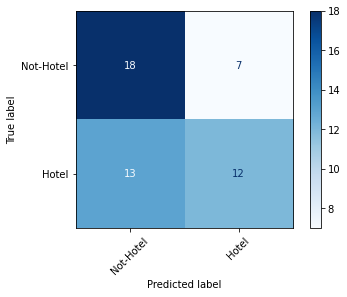

In [13]:
# Function to select the data
def get_data_(df):
    data = df[['friends_hotel_count_1000', 'followers_hotel_count_1000']].to_numpy()
    return data

# Load the model
model_frfo = joblib.load('classifiers/classifier_hotel_frfo.sav')

target_names = ['Not-Hotel', 'Hotel']
predicted_labels = model_frfo.predict(validation_set)
print(classification_report(y_true = validation_set.hotel, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(model_frfo, validation_set, validation_set.hotel, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)

predictions['frfo'] = predicted_labels

## Name Description Tweets Counts

              precision    recall  f1-score   support

   Not-Hotel       0.89      1.00      0.94        25
       Hotel       1.00      0.88      0.94        25

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



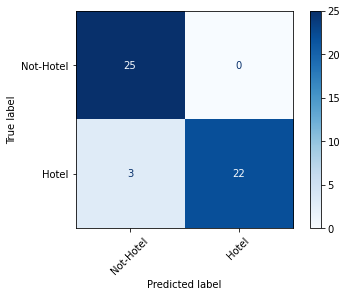

In [14]:
def get_text_data_(df):
    df = df.copy()
    df['textdata'] = clean_text(df['name']+ ' ' + df['description'] + ' ' + df['recent_100_statuses'])
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize_en(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: remove_stopwords(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    return df.textdata


def get_numeric_data_(df):
    data = df[['friends_hotel_count_1000', 'followers_hotel_count_1000']].to_numpy()
    return data


# Load the model
model_ndtfrfo = joblib.load('classifiers/classifier_hotel_ndtfrfo.sav')

target_names = ['Not-Hotel', 'Hotel']
predicted_labels = model_ndtfrfo.predict(validation_set)
print(classification_report(y_true = validation_set.hotel, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(model_ndtfrfo, validation_set, validation_set.hotel, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)

predictions['ndtfrfo'] = predicted_labels

# Case 4: Parliament Member Mentions Count

## Only Counts

              precision    recall  f1-score   support

   Not-Hotel       0.50      0.76      0.60        25
       Hotel       0.50      0.24      0.32        25

    accuracy                           0.50        50
   macro avg       0.50      0.50      0.46        50
weighted avg       0.50      0.50      0.46        50



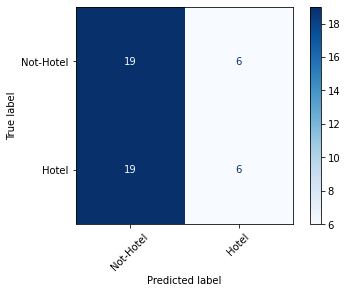

In [15]:
# Function to select the data
def get_data_(df):
    data = df['mention_hotel_count'].to_numpy()
    return data.reshape(-1,1)

# Load the model
model_me = joblib.load('classifiers/classifier_hotel_me.sav')

target_names = ['Not-Hotel', 'Hotel']
predicted_labels = model_me.predict(validation_set)
print(classification_report(y_true = validation_set.hotel, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(model_me, validation_set, validation_set.hotel, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)

predictions['me'] = predicted_labels

## Statuses and Mentions

              precision    recall  f1-score   support

   Not-Hotel       0.96      0.92      0.94        25
       Hotel       0.92      0.96      0.94        25

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



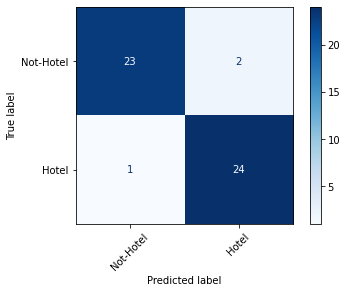

In [16]:
# Function to select the data
def get_text_data_hotel_tme(df):
    df = df.copy()
    df['textdata'] = clean_text(df['recent_100_statuses'])
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize_en(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: remove_stopwords(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    return df.textdata


def get_numeric_data_hotel_tme(df):
    data = df['mention_hotel_count'].to_numpy()
    return data.reshape(-1,1)

# Load the model
model_tme = joblib.load('classifiers/classifier_hotel_tme.sav')

target_names = ['Not-Hotel', 'Hotel']
predicted_labels = model_tme.predict(validation_set)
print(classification_report(y_true = validation_set.hotel, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(model_tme, validation_set, validation_set.hotel, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)

predictions['tme'] = predicted_labels

## Name Description Tweets all Counts

              precision    recall  f1-score   support

   Not-Hotel       0.89      1.00      0.94        25
       Hotel       1.00      0.88      0.94        25

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



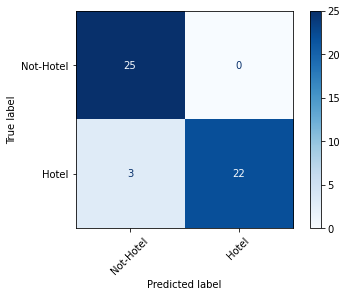

In [17]:
def get_text_data_(df):
    df = df.copy()
    df['textdata'] = clean_text(df['name'] + ' ' + df['description'] + ' ' + df['recent_100_statuses'])
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: tokenize_lemmatize_en(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    df['textdata'] = df['textdata'].apply(lambda row: remove_stopwords(row))
    df['textdata'] = df['textdata'].apply(lambda row: ' '.join(row))
    return df.textdata

def get_numeric_data_(df):
    data = df[['friends_hotel_count_1000', 'followers_hotel_count_1000', 'mention_hotel_count']].to_numpy()
    return data


# Load the model
model_ndtfrfome = joblib.load('classifiers/classifier_hotel_ndtfrfome.sav')

target_names = ['Not-Hotel', 'Hotel']
predicted_labels = model_ndtfrfome.predict(validation_set)
print(classification_report(y_true = validation_set.hotel, y_pred=predicted_labels, target_names=target_names))
plot_confusion_matrix(model_ndtfrfome, validation_set, validation_set.hotel, display_labels=target_names, xticks_rotation=45, cmap=plt.cm.Blues)

predictions['ndtfrfome'] = predicted_labels

# Failure Analaysis
---

In [24]:
predictions[(predictions['true_label'] != predictions['nd'])
           |(predictions['true_label'] != predictions['ndt'])
           |(predictions['true_label'] != predictions['ndtfr'])
           |(predictions['true_label'] != predictions['ndtfrfo'])
           |(predictions['true_label'] != predictions['ndtfrfome'])][['screen_name','true_label','nd','ndt','ndtfr','ndtfrfo', 'ndtfrfome']]

,screen_name,true_label,nd,ndt,ndtfr,ndtfrfo,ndtfrfome
3,paphotels,1,0,1,1,1,1
4,medpalace,1,1,1,0,1,1
10,santo_wines,0,0,1,0,0,0
13,alikescamping,1,0,1,1,0,0
16,remvibar,0,0,0,1,0,0
22,AcroterraRosa,1,1,1,0,1,1
25,HotelOlympiaSKG,1,1,0,1,1,1
32,MedRoyalHotel,1,0,1,1,0,0
39,Portokoufo,1,1,1,0,0,0
40,ikieshotel,1,1,1,0,1,1


In [22]:
predictions[(predictions['true_label'] != predictions['nd'])
           |(predictions['true_label'] != predictions['t'])
           |(predictions['true_label'] != predictions['fr'])
           |(predictions['true_label'] != predictions['fo'])][['screen_name','true_label','nd','t','fr','fo']]

,screen_name,true_label,nd,t,fr,fo
0,SophiaSuites,1,1,1,0,0
1,AnthiMariaApart,1,1,1,0,0
2,wEndowproject,1,1,1,1,0
3,paphotels,1,0,1,1,1
4,medpalace,1,1,1,1,0
6,Goodyscom,0,0,0,1,0
8,TGIFridaysGR,0,0,0,1,0
10,santo_wines,0,0,0,0,1
11,Avis_Greece,0,0,0,1,1
13,alikescamping,1,0,1,0,0


In [9]:
predictions[(predictions['true_label'] != predictions['t'])][['screen_name','true_label','t']]

,screen_name,true_label,t
16,remvibar,0,1
39,Portokoufo,1,0
